In [117]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")


In [81]:
df_train = pd.read_csv("../dataset/train.csv")

In [83]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df_train.shape

(614, 13)

In [86]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
df_train.duplicated().sum()

0

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [89]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [90]:
df_test.nunique()


Loan_ID              367
Gender                 3
Married                2
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
dtype: int64

In [91]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [92]:
df_train.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [93]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df_train['Gender'].unique())

print("Categories in 'Married' variable:     ",end=" " )
print(df_train['Married'].unique())

print("Categories in 'Dependents' variable:     ",end=" " )
print(df_train['Dependents'].unique())

print("Categories in 'Education' variable:     ",end=" " )
print(df_train['Education'].unique())

print("Categories in 'Self_Employed' variable:     ",end=" " )
print(df_train['Self_Employed'].unique())

print("Categories in 'Property_Area' variable:     ",end=" " )
print(df_train['Property_Area'].unique())

Categories in 'Gender' variable:      ['Male' 'Female' nan]
Categories in 'Married' variable:      ['No' 'Yes' nan]
Categories in 'Dependents' variable:      ['0' '1' '2' '3+' nan]
Categories in 'Education' variable:      ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:      ['No' 'Yes' nan]
Categories in 'Property_Area' variable:      ['Urban' 'Rural' 'Semiurban']


In [27]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df_test['Gender'].unique())

print("Categories in 'Married' variable:     ",end=" " )
print(df_test['Married'].unique())

print("Categories in 'Dependents' variable:     ",end=" " )
print(df_test['Dependents'].unique())

print("Categories in 'Education' variable:     ",end=" " )
print(df_test['Education'].unique())

print("Categories in 'Self_Employed' variable:     ",end=" " )
print(df_test['Self_Employed'].unique())

print("Categories in 'Property_Area' variable:     ",end=" " )
print(df_test['Property_Area'].unique())

Categories in 'Gender' variable:      ['Male' 'Female' nan]
Categories in 'Married' variable:      ['Yes' 'No']
Categories in 'Dependents' variable:      ['0' '1' '2' '3+' nan]
Categories in 'Education' variable:      ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:      ['No' 'Yes' nan]
Categories in 'Property_Area' variable:      ['Urban' 'Semiurban' 'Rural']


### Exploratory Data Analysis

******************
Gender
Male      489
Female    112
Name: count, dtype: int64
******************
Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64
*******************


<Axes: xlabel='Gender', ylabel='Count'>

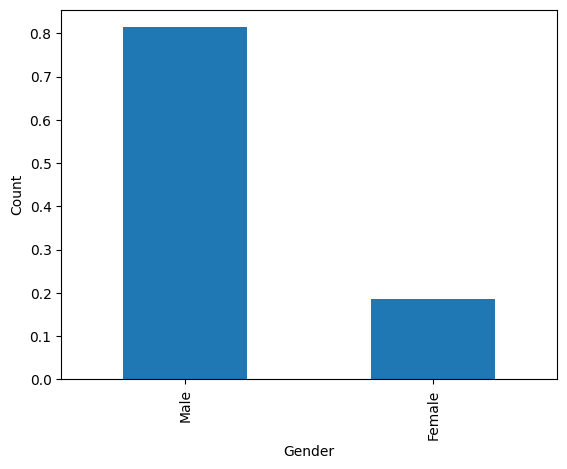

In [94]:
count=df_train.Gender.value_counts()
print("******************")
print(count)
print("******************")
gc=df_train.Gender.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Gender")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
Married
Yes    398
No     213
Name: count, dtype: int64
******************
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64
*******************


<Axes: xlabel='Married', ylabel='Count'>

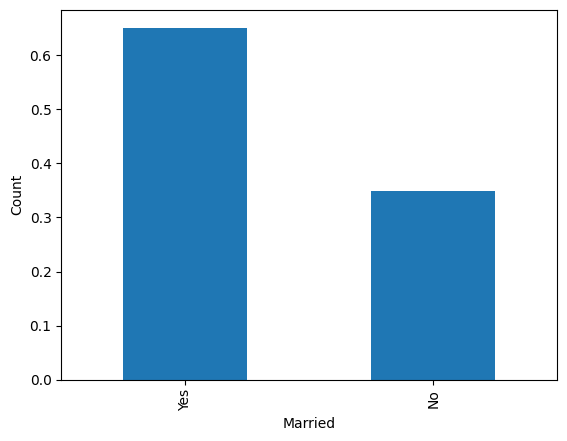

In [95]:
count=df_train.Married.value_counts()
print("******************")
print(count)
print("******************")
gc=df_train.Married.value_counts(normalize=True)
print(gc)
print("*******************")
plt.figure()
plt.xlabel("Married")
plt.ylabel("Count")
gc.plot(kind="bar")

******************
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
******************
Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: proportion, dtype: float64
*******************


<Axes: xlabel='Dependents', ylabel='Count'>

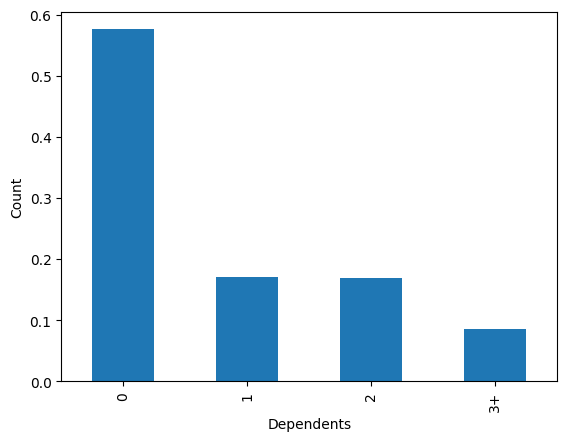

In [96]:
count=df_train.Dependents.value_counts()
print("******************")
print(count)
print("******************")
dc=df_train.Dependents.value_counts(normalize=True)
print(dc)
print("*******************")
plt.figure()
plt.xlabel("Dependent")
plt.ylabel("Count")
dc.plot(kind="bar")

******************
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
******************
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64
*******************


<Axes: xlabel='Education', ylabel='Count'>

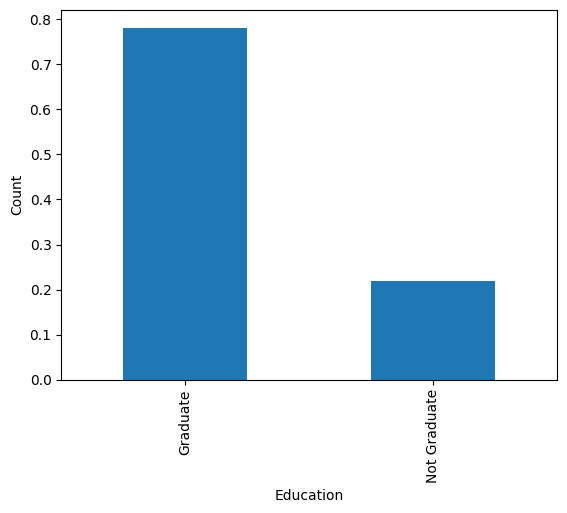

: 

In [ ]:

count=df_train.Education.value_counts()
print("******************")
print(count)
print("******************")
ec=df_train.Education.value_counts(normalize=True)
print(ec)
print("*******************")
plt.figure()
plt.xlabel("Education")
plt.ylabel("Count")
ec.plot(kind="bar")

******************
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
******************
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64
*******************


<Axes: xlabel='Self_Employed', ylabel='Count'>

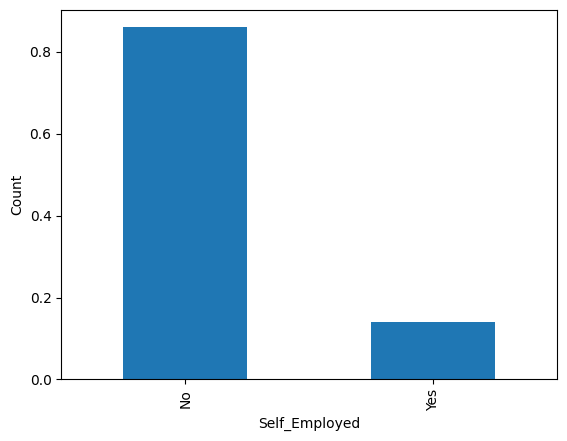

In [97]:
count=df_train.Self_Employed.value_counts()
print("******************")
print(count)
print("******************")
ec=df_train.Self_Employed.value_counts(normalize=True)
print(ec)
print("*******************")
plt.figure()
plt.xlabel("Self Employed")
plt.ylabel("Count")
ec.plot(kind="bar")

******************
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
******************
Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64
*******************


<Axes: xlabel='Credit_History', ylabel='Count'>

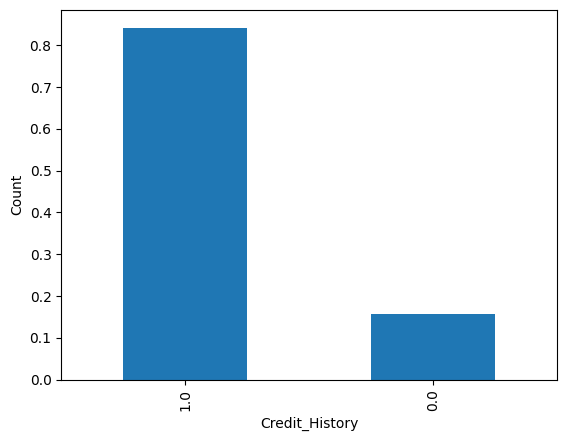

In [98]:
count=df_train.Credit_History.value_counts()
print("******************")
print(count)
print("******************")
cc=df_train.Credit_History.value_counts(normalize=True)
print(cc)
print("*******************")
plt.figure()
plt.xlabel("Credit History")
plt.ylabel("Count")
cc.plot(kind="bar")

******************
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
******************
Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64
*******************


<Axes: xlabel='Property_Area', ylabel='Count'>

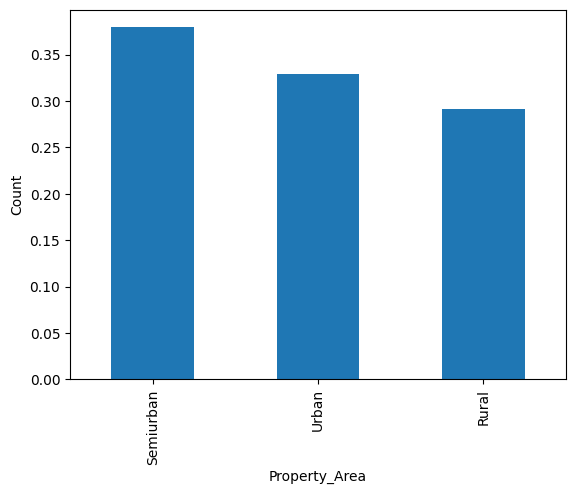

In [99]:
count=df_train.Property_Area.value_counts()
print("******************")
print(count)
print("******************")
pc=df_train.Property_Area.value_counts(normalize=True)
print(pc)
print("*******************")
plt.figure()
plt.xlabel("Property Area")
plt.ylabel("Count")
pc.plot(kind="bar")

In [100]:
df_train.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [101]:
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Loan_Amount_Term','Property_Area','Loan_Status']
label_encoder = LabelEncoder()
# Train Data
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [102]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,1


### Missing Value imputation

In [104]:
numerical_columns = ['LoanAmount','CoapplicantIncome','ApplicantIncome']
num_imputer = SimpleImputer(strategy='median')
df_train[numerical_columns] = num_imputer.fit_transform(df_train[numerical_columns])

In [105]:
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Loan_Amount_Term','Property_Area','Loan_Status']
cat_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_columns] = num_imputer.fit_transform(df_train[categorical_columns])

In [106]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,8.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,8.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,8.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,8.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,8.0,1.0,2.0,1.0


In [107]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

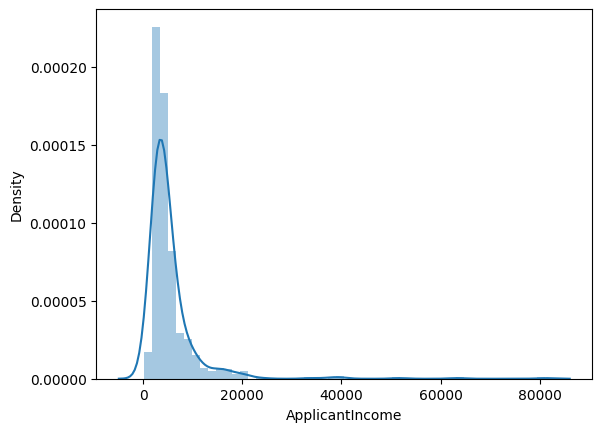

In [108]:
sns.distplot(df_train['ApplicantIncome'])

In [109]:
X = df_train.drop(['Loan_ID','Loan_Status'], axis=1)
y = df_train['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

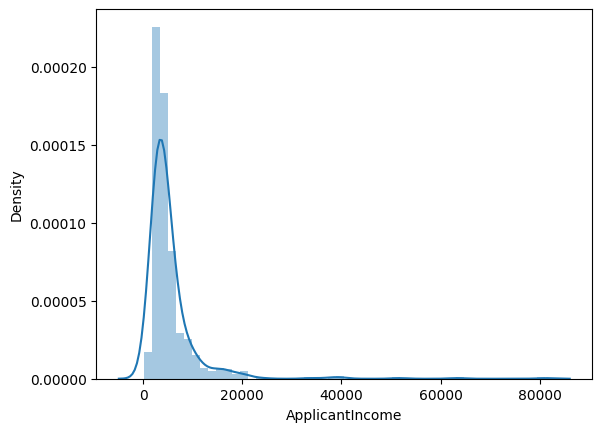

In [111]:
sns.distplot(df_train['ApplicantIncome'])

In [112]:
X.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,-4.339634e-18,4.050325e-17,-2.603780e-17,7.713355,0.936482,1.037459
std,0.421752,0.484971,1.120531,0.413389,0.534737,1.000815e+00,1.000815e+00,1.000815e+00,1.161895,0.471924,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.627255e+00,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.414462e-01,8.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.112412e-01,8.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,6.414426e-02,2.312023e-01,2.260572e-01,8.000000,1.000000,2.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,1.238462e+01,1.369617e+01,6.595146e+00,10.000000,2.000000,2.000000


In [113]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

# Modeling

In [131]:
def evalutation_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    # Precision, Recall, F1 score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    return accuracy, precision, recall, f1, conf_matrix

In [132]:
models ={
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
    
}
model_list = []
f1_score_ = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_score_train, precision_score_train, recall_score_train, f1_score_train, confision_metrics_train = evalutation_classification(y_train, y_pred_train)
    accuracy_score_test, precision_score_test, recall_score_test, f1_score_test, confision_metrics_test = evalutation_classification(y_test, y_pred_test)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score:",accuracy_score_train)
    print("- Precision Score:",precision_score_train)
    print("- Recall Score:",recall_score_train)
    print("- F1 Score:",f1_score_train)

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score:",accuracy_score_test)
    print("- Precision Score:",precision_score_test)
    print("- Recall Score:",recall_score_test)
    print("- f1 Score:",f1_score_test)
    f1_score_.append(f1_score_)
    
    print('='*42)
    print('\n')

LogisticRegression
Model performance for Training set
- Accuracy Score: 0.814663951120163
- Precision Score: 0.7995226730310262
- Recall Score: 0.97953216374269
- F1 Score: 0.8804204993429697
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7886178861788617
- Precision Score: 0.7596153846153846
- Recall Score: 0.9875
- f1 Score: 0.8586956521739131


DecisionTreeClassifier
Model performance for Training set
- Accuracy Score: 1.0
- Precision Score: 1.0
- Recall Score: 1.0
- F1 Score: 1.0
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6585365853658537
- Precision Score: 0.7435897435897436
- Recall Score: 0.725
- f1 Score: 0.7341772151898734


RandomForestClassifier
Model performance for Training set
- Accuracy Score: 1.0
- Precision Score: 1.0
- Recall Score: 1.0
- F1 Score: 1.0
----------------------------------
Model performance for Test set
- Accuracy Score: 0.7723577235772358
- Precision Score: 0.7549019607843